# Exercise 6.4

## 01 Importing Libraries and Data set

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Propt to display Graphs
%matplotlib inline

In [6]:
# Path creation
path = r'/Users/Andreas/Desktop/28-02-2025 Chocolate Ratings Analysis/02 Data/Prepared Data'

In [7]:
CRA = pd.read_csv(os.path.join(path, 'flavours_of_cocoa_clean.csv'))

**Using Cleaned Data so going straight into preparation for Regression analysis**

## 02 Preparation for Regression Analysis

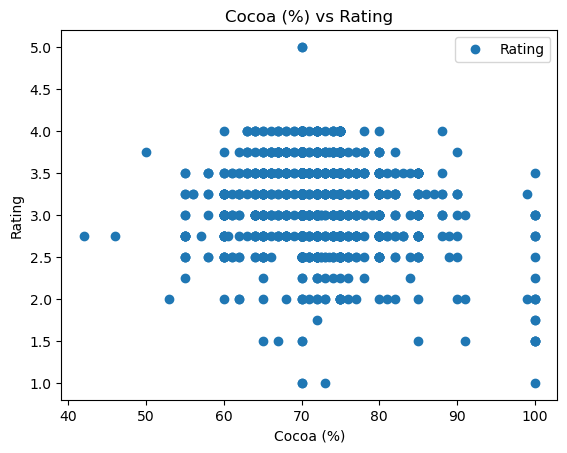

In [16]:
# Create a scatterplot using matplotlib to see how variables plot against each other

CRA.plot(x = 'Cocoa (%)', y='Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Cocoa (%) vs Rating')  
plt.xlabel('Cocoa (%)')  
plt.ylabel('Rating')  
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = CRA['Cocoa (%)'].values.reshape(-1,1)
y = CRA['Rating'].values.reshape(-1,1)

In [26]:
X

array([[63.],
       [70.],
       [70.],
       ...,
       [65.],
       [62.],
       [65.]])

In [29]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 03 Regression Analysis

In [34]:
# Create a regression object.
regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [37]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

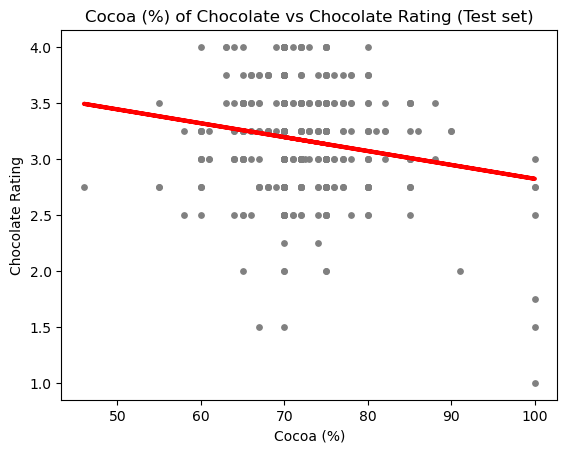

In [43]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa (%) of Chocolate vs Chocolate Rating (Test set)')
plot_test.xlabel('Cocoa (%)')
plot_test.ylabel('Chocolate Rating')
plot_test.show()

In [46]:
# Create objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [49]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01240188]]
Mean squared error:  0.2114552345916236
R2 score:  0.022502544302339


In [52]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,3.25,3.132392
1,4.00,3.194402
2,2.75,3.169598
3,3.75,3.194402
4,3.50,3.132392
5,3.00,3.169598
6,3.75,3.194402
7,2.75,3.107588
8,3.75,3.231607
9,3.25,3.157196


In [55]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train

In [58]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [61]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.01240188]]
Mean squared error:  0.22873347096466942
R2 score:  0.026546642468066817


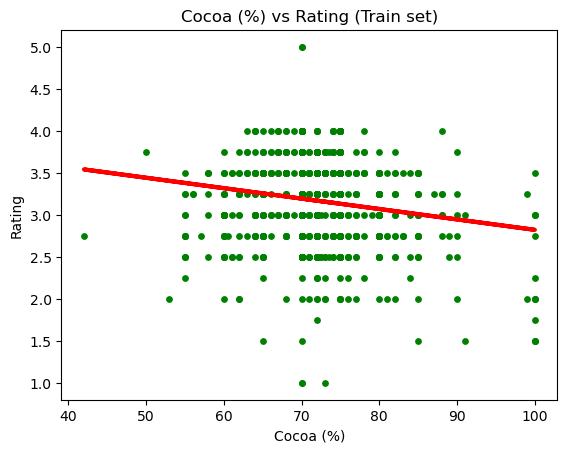

In [68]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa (%) vs Rating (Train set)')
plot_test.xlabel('Cocoa (%)')
plot_test.ylabel('Rating')
plot_test.show()

### Obeservations

There is no correlation between the two, however I think there is either a bias of sample where most bars tested where between 60% - 80% Cocoa it would be easier to understand if the range of Cocoa (%) content was more diverse or had adequate representative samples from all Cocoa (%) content. Furthermore, this could also be seen as a limitation maybe companies produce chocolate which is 60% - 80% as a standard as maybe through their own analytical process they may have found that the range 60% - 80% is most sought after by consumers. 